# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
Un scatterplot est un graphique sous forme d'un nuage de points montrant comment une variable est affectée par une autre.
Il est souvent utilisés pour représenter une corrélation entre variables quantitatives qui semblent être liées.
On les utilises pour analyser des relations entres les variables.
comme les relations fortes/faibles, les relations positives/négatives, des relations linéaires/non-linéaires.

Un barplot est un graphique qui utilise des barre rectangulaires pour représenter visuellement la valeur d'une variable. Chaque barre représente une catégorie ou groupe spécifique et sa longueur est proportionnelle à la valeur qu'elle représente.
Il est utilisé pour montrer des comparaison numériques discrètes entre les des catégories. 

Un boxPlot est un graphique simple composé d'un rectangle duquel deux droites sortent afin de représenter certains éléments des données. Il est utilisé pour visualiser des concepts tels que la symétrie, la dispersion ou la centralité de la distribution des valeurs associées à une variable.Ils sont aussi très intéressant pour comparer des variables basées sur des échelles similaires et pour comparer les valeurs des observations de groupes d'individus sur la même variable.

un violinplot est utilisé pour visualiser la distribution des données et sa densité de probabilité.
Ce graphique est une combinaison d’un boxplot et d’un density plot retourné placé de chaque côté, pour afficher la distribution des données. Les violin plots comprennent un marqueur pour la médiane des données et une case indiquant l’écart interquartile, comme des boxplots standard.
Une représentation graphique en violin plot montre plus d’informations qu’une représentation graphique en boxplot.

un histogramme est une représentation graphique permettant de représenter la répartition empirique d'une variable aléatoire ou d'une série statistique en la représentant avec des colonnes correspondant chacune à une classe et dont l'aire est proportionnelle à l'effectif de la classe. Il est particulièrement utile pour observer la forme générale de la distribution (symétrie, asymétrie, multimodalité). Identifier des tendances ou des regroupements de données. Détecter des valeurs aberrantes ou des écarts par rapport à une distribution attendue.

```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau récapitulatif des organismes pour lesquels il existe un ou plusieurs projet de séquençage de génome qu'ils soient achevés, en cours ou prévu.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name représente le nom de l'ogranisme au niveau de l'espèce.
Kingdom représente sa classification taxonomique, incluant le royaume.
Group représente la classification des organismes en groupes communément utilisés.
SubGroup représente le niveau taxonomique plus précis que celui indiqué dans Group permettant de raffiner la classification d'un organisme.
Size représente la taille estimée des génomes
Chrs représente le nombre de chromosomes
Organelles représente le nombre d'organites.
Plasmids représente le nombre de plasmides.
BioProject représente le nombre de projets de séquençages génomique.

```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [3]:
with open('overview.txt', 'r') as file:
    lines = file.readlines()
nbr_organisme = len(lines) - 1
print(nbr_organisme)

87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
un royaume est une division taxonomique qui regroupe des organisme en fonction des caratéristiques fondamentales.
La taxonomie est la science qui s'occupe de la classification des organismes vivants en groupes hiérarchisés en fonction de leurs caractéristiques communes et de leurs caractéristiques communes et de leurs relations évolutives.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y a 4 royaumes qui sont présents dans la base.
Les 4 royaumes sont Archaea, Bacteria, Eukaryota, ou Viruses.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [15]:
from collections import Counter

kd_counts = Counter()

with open('overview.txt', 'r') as file:
    header = file.readline()
    for line in file:
        parts = line.split('\t')
        if (len(parts) >= 2):
            kd = parts[1]
            kd_counts[kd] += 1
for kd, count in kd_counts.items():
    print(f"{kd} : , {count}")    

Bacteria : , 37492
Viruses : , 32573
Eukaryota : , 15560
Archaea : , 2263


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un groupe correspond à une classification simplifiée qi regroupe les organismes en grandes catégories.
Les Eukaryoptes, le groupe indique les catégories bien définies commes Animals, Fungi
Les Prokaryotes, il représente généralement le phylum auquel appartient l'organisme.
Les viruses, il correspond à un niveau de subdivision défini en dessous du royaume, mais qui n'est pas classé de manière hiérarchique.
```

Q9. Combien de groupes sont présents par royaume ?

In [2]:
kd_gp = set()
with open('overview.txt', 'r') as file:
    header = file.readline()
    for line in file:
        parts = line.split('\t')
        if (len(parts) >= 3):
            kd = parts[1]
            gp = parts[2]
            kd_gp.add((kd, gp))
result = {}
for kd, gp in kd_gp:
    if kd not in result:
        result[kd] = []
    result[kd].append(gp)
for kd, gps in result.items():
    print(f"{kd} : {len(gps)}")

Bacteria : 37
Archaea : 11
Viruses : 8
Eukaryota : 5


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [21]:
from collections import Counter
counts = Counter()
with open('overview.txt', 'r') as file:
    header = file.readline()
    for line in file:
        parts = line.split('\t')
        if (len(parts)>=3):
            kd = parts[1]
            gp = parts[2]
            counts[(kd, gp)] += 1
result = {}
for (kd, gp), count in counts.items():
    if kd not in result:
        result[kd] = []
    result[kd].append((gp, count))

for kd, grps in result.items():
    print(f"{kd} : {len(grps)}")
    for gp, count in grps:
        print(f"  {gp} : {count}")


Bacteria : 37
  Terrabacteria group : 13337
  unclassified Bacteria : 346
  FCB group : 5037
  Pseudomonadota : 11098
  Acidobacteriota : 256
  Synergistota : 85
  Bacteria incertae sedis : 3872
  PVC group : 1091
  Myxococcota : 146
  Campylobacterota : 256
  Thermodesulfobacteriota : 568
  Spirochaetota : 344
  Aquificota : 42
  Thermotogota : 72
  Atribacterota : 43
  Other : 2
  Bdellovibrionota : 122
  delta/epsilon subdivisions : 288
  Caldisericota/Cryosericota group : 21
  Deferribacterota : 27
  Calditrichota : 10
  Candidatus Lernaellota : 2
  Elusimicrobiota : 118
  Fusobacteriota : 79
  Candidatus Deferrimicrobiota : 2
  Nitrospinota/Tectimicrobiota group : 39
  Candidatus Hinthialibacterota : 2
  Candidatus Krumholzibacteriota : 4
  Nitrospirota : 156
  Candidatus Moduliflexota : 2
  Candidatus Tharpellota : 2
  Chrysiogenota : 6
  Coprothermobacterota : 5
  Dictyoglomota : 5
  environmental samples : 4
  Thermodesulfobiota : 2
  Thermosulfidibacterota : 1
Viruses : 8
  Ot

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

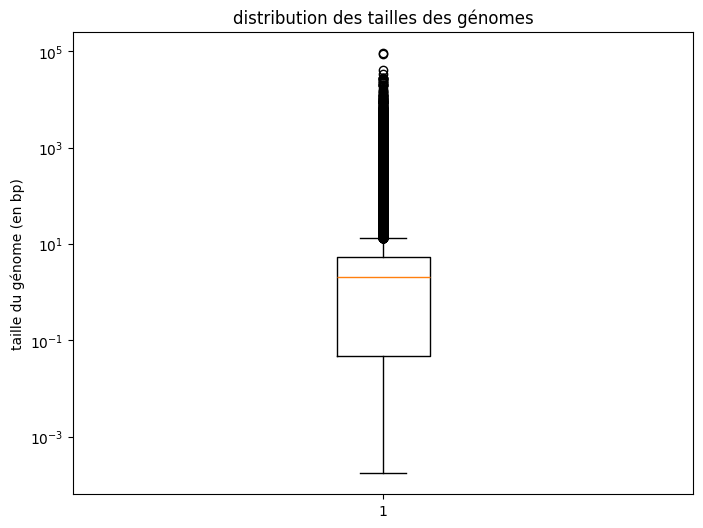

In [52]:
import matplotlib.pyplot as plt

tailles = []

with open('overview.txt', 'r') as file:
    header = file.readline()
    for line in file:
        parts = line.split('\t')
        if (len(parts)>=4):
            try:
                taille = float(parts[4])
                tailles.append(taille)
            except ValueError:
                continue
plt.figure(figsize=(8,6))
plt.boxplot(tailles)
plt.yscale('log')
plt.title('distribution des tailles des génomes')
plt.ylabel('taille du génome (en bp)')
plt.show()

Q12. Affichez la distribution par royaume.

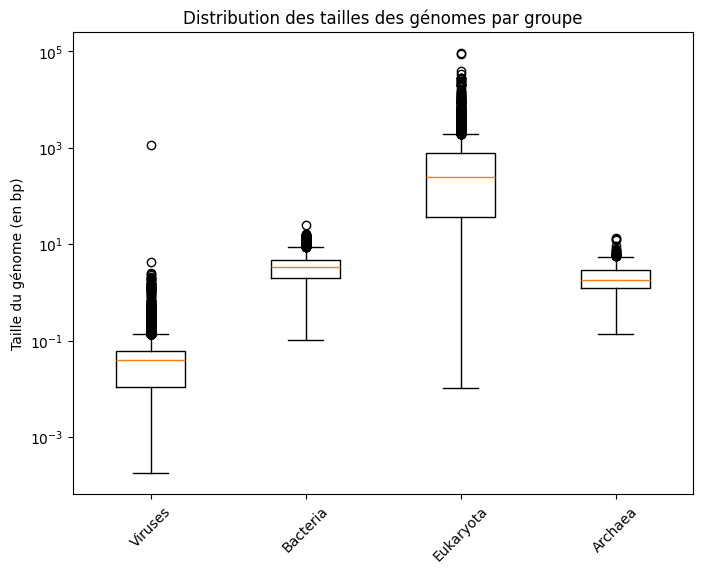

In [ ]:
import matplotlib.pyplot as plt

kd_size = set()
with open('overview.txt', 'r') as file:
    header = file.readline()
    for line in file:
        parts = line.split('\t')
        if (len(parts)>=5):
            try:
                kd = parts[1]
                size = (float(parts[4]))
                kd_size.add((kd, size))
            except ValueError:
                continue
results = {}
for kd, size in kd_size:
    if kd not in results:
        results[kd] = []
    results[kd].append(size)

plt.subplots(figsize=(8,6))
plt.boxplot(results.values())
plt.yscale('log')
plt.xticks(range(1, len(results)+1), results.keys(), rotation=45)
plt.title('Distribution des tailles des génomes par groupe')
plt.ylabel('Taille du génome (en bp)')
plt.show()


Q13. Affichez la distribution par groupe pour chaque royaume.

In [ ]:
#Votre code ici

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [ ]:
#Votre code ici

Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [ ]:
#Votre code ici

## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

In [ ]:
#Votre code ici

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

In [ ]:
#Votre code ici

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

In [ ]:
#Votre code ici

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

In [ ]:
#Votre code ici

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici